# Practising visaulization and ML on a food dataset

this script is a readaptation of Brice's kernel on the "what's cooking?" dataset from Kaggle



In [56]:
import pandas as pd
import matplotlib.pyplot as plt

train_df = pd.read_json('train.json')
train_df.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


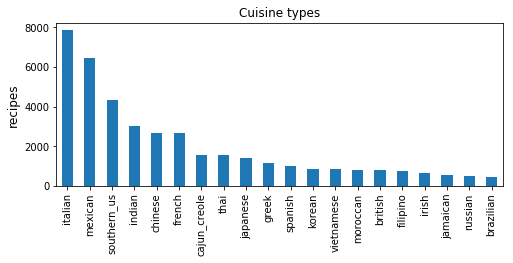

In [63]:
ax = train_df['cuisine'].value_counts().plot(kind = 'bar', 
                                             title = "Cuisine types", 
                                             figsize = (8, 3), 
                                             legend = False)
ax.set_ylabel("recipes", fontsize=12)
plt.show()

##### note that some cuisines are more frequent than others
this could be an issue when training and testing classification and regression models. consider stratified sampling

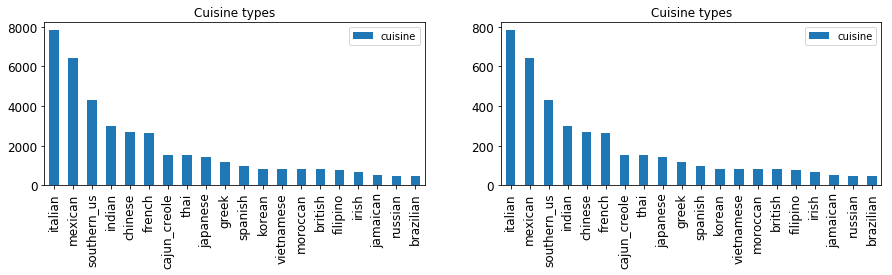

In [79]:
from sklearn.model_selection import StratifiedShuffleSplit

# first, select a stratified random sample of the data (10%), so it doesn't take ages...
# I will use the StratifiedShuffleSplit method, not sure there is something more appropriate
split = StratifiedShuffleSplit(n_splits = 1, test_size = .9, random_state = 42)
for keep_idx, drop_idx in split.split(train_df, train_df['cuisine']): # guarantee that ratios of cuisine are respected
    small_dataset = train_df.iloc[keep_idx]

# graphically check that dataset is reduced to 10%, and ratios are maintained
figure, (ax1, ax2) = plt.subplots(1,2)
train_df['cuisine'].value_counts().plot(ax = ax1, kind='bar', title ="Cuisine types", figsize=(15, 3), legend=True, fontsize=12)
small_dataset['cuisine'].value_counts().plot(ax = ax2, kind='bar', title ="Cuisine types", figsize=(15, 3), legend=True, fontsize=12)
plt.show()

In [81]:
# now, devide the small dataset in train and test sets (80/20 ratio), again with stratified sampling
split = StratifiedShuffleSplit(n_splits = 1, test_size = .2, random_state = 42)
for train_idx, test_idx in split.split(small_dataset, small_dataset['cuisine']): 
    X_train = small_dataset.iloc[train_idx]
    X_test = small_dataset.iloc[test_idx]


,cuisine,id,ingredients
33026,filipino,27332,"[ground chicken, water chestnuts, kinchay, gla..."
20682,greek,46639,"[eggs, milk, garlic, plum tomatoes, water, but..."
33645,italian,14827,"[seasoned bread crumbs, large eggs, olive oil,..."
24862,french,16418,"[unsweetened cocoa powder, extract, dark choco..."
26538,italian,8933,"[eggs, salt, frozen chopped spinach, ricotta c..."


### now the machine learning part
First, we make a matrix that, for every recipe (row) and for every ingredient (col),
there is 1 if the recipe uses that ingredient, and 0 otherwise.

In [ ]:
import numpy as np
# first, find a unique list of ingredients and cuisines
ingredients = []
print(small_dataset.head())
[ingredients.extend(X_train.iloc[recipe].ingredients) for recipe in range(len(X_train))]
ingredients = list(set(ingredients))
cuisines = X_train['cuisine'].unique()
    
# now create the matrix. this won't scale up very well, we should think about more efficient solutions
X = np.zeros(shape = (len(X_train), len(ingredients)))
for recipe in range(len(X_train)):
    for ingredient in range(len(ingredients)):
        X[recipe,ingredient] = 1 if ingredients[ingredient] in X_train.iloc[recipe].ingredients else 0
   

In [97]:
# here an alternative solution that makes computation times more manageable: get rid of less frequent ingredients
from collections import Counter
counts = Counter(ingredients)
counts.keys()[int(counts.values()) > 1]




TypeError: int() argument must be a string, a bytes-like object or a number, not 'dict_values'